# ___Decision Trees___
Decision Tree is a powerful, versatile machine learning algorithm that can be used in classification, regression and even multioutput problems

## _Classification_

In [1]:
## Lets test and visualize a trained decision tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Get the data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.feature_names, iris.target_names)

X = iris.data[:,2:]  ## Taking petal length and width
y = iris.target

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


#### Train the model

In [3]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=2,random_state=42)
decision_tree.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

#### Visualize the trained tree

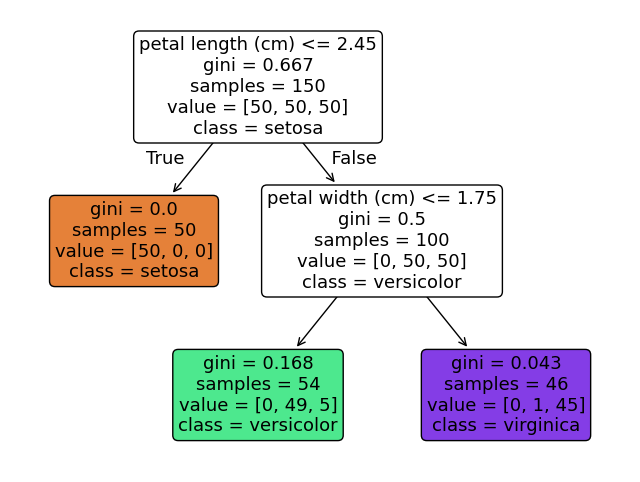

In [4]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
tree.plot_tree(
    decision_tree, 
    feature_names=iris.feature_names[2:], 
    class_names=iris.target_names, 
    filled=True, 
    rounded=True
)
plt.show()

Lets understand this tree:

`node`: a point in the tree where decision is being made    
3 types of nodes: 
- Root node: very first node (at the top). It represents entire dataset and does first best split of data based on question of a feature.  
ex: top node in last tree asks about 'petal length', if true->Left if false->Right  
- Decision node: Intermediary node that asks question of some feature and splits the data futher  
ex: 'petal width' node on depth 1 (right side)
- Leaf node: Terminal node, final node that do not ask question and give output  
ex: all colored nodes above

Node attributes:  
- The first line asks question (if not leaf node) based on which it splits the data.
- gini: it measures impurity. if gini=0 --> the node is called '_pure_'. that means, all the training instances in that node belong to same class
- samples: number of samples in training data that node applies to (i.e the condition is true for that many number of samples in the data)
- value: number of samples of each class that this node applies to (i.e tells distribution of samples to each class)

_Formula to calculate gini_:
$$
G_i = 1 - \sum_{k=1}^{n} P_{i,k}^2
$$

where:
- i = ith node
- k = class k 
- $P_{i,k}$ = ratio of kth class instances to ith node instances

ex: at depth=2 left leaf node, $G = 1 - ((\frac{0}{54})^2 + (\frac{49}{54})^2 + (\frac{5}{54})^2) = 0.168$


Below is the decision boundary of decision tree. interpret it!

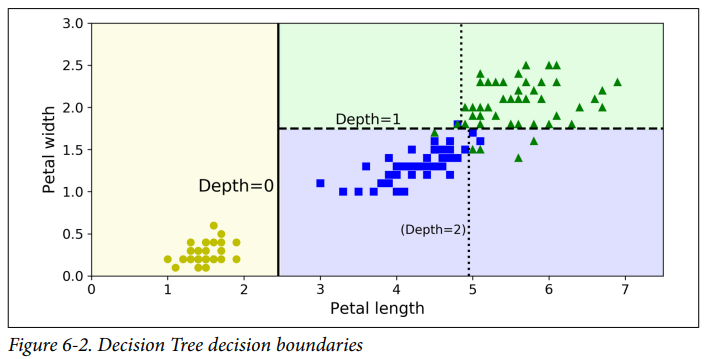

## __White Box Vs Black Box Models__
White box : models such as Decision Tree are easy to interpret and we can predict outputs even by manual calculation, Such type of models are called _White Box_ models, we can interpret them easily and understand why they predicted something  


Black Box : model such as RandomForest or Neural Networds are complex models models and although we can check the calculations they performed to get the prediction but its very difficult to explain in easy terms that why exactly they prediction was made

### Estimating class probabilities
Decision Tree also gives class probabilities

In [8]:
decision_tree.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

that means probability is,: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54),
and 9.3% for Iris virginica (5/54). And if you ask it to predict the class, it should out‐
put Iris versicolor (class 1) because it has the highest probability

In [10]:
decision_tree.predict([[5,1.5]])

array([1])

### CART (Classification And Regression Training Algo)

__`Note`__  
Scikit-Learn uses the CART algorithm to train decision trees, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two
children

The algorithms works as :  
It splits the data into two subsets using single feature $k$ and its thresold $t_k$.  
To find the best pair of $(k,t_k)$ which splits the data into two purest subsets, it _minimizes_ the cost function below 

- Cost function for classification problem
$$
J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right} 
$$


after the first split, it continues doing it further using same logic recursively till either `max_depth` is achieved or model cannot find another split that can reduce impurity.  
Although there are more parameters that decides when to stop (we will see it in a moment)

### Computational complexity

- For prediction the decision tree has to move step by step through every node from root to leaf, this require complexity of:  
Prediction complexity:  $O(log_2m)$

- For training the algorithm has to compare all features for all samples at each node.  
Training complexity: $O(n \times m \times log_2m)$

- If training data is small (few thousands sample) we can use `presort=True` that will speed up the training. But dont do that for large datsets, it will then become considerably slow

### Gini impurity OR Entropy?

Gini impurity :
$$
G_{i,k} = 1 - \sum_{i=1}^{n} P_{i,k}^2
$$

Entropy :
$$
H_{i,k} = - \sum_{k=1}^{n} P_{i,k} \times log_2(P_{i,k})
$$

where, $P_{i,k}$ is ratio of kth class in ith node.

Entropy is a concept of thermodynamics, its a measure of disorder there, if all atoms are in perfect order the entropy=0.  
In Statistics entropy is used as measure of impurity. If a node contains samples of only one class it is said to have zero impurity i. zero entropy


- We can select the impurity measure from `criterion` hyperparameter.  

__Which one to choose?__  
Gini Impurity is generally more computationally efficient than entropy. The graph of entropy increases up to 1 and then starts decreasing, while Gini Impurity only goes up to 0.5 before decreasing, thus requiring less computational power. The range of entropy is from 0 to (log2C), whereas the range of Gini Impurity is from 0 to 0.5 (for binary classification).

### Data preparation
Decision tree require very data preparation  
And no standardization is reqiured

### Regularization Hyperparameters
Decision Tree is a type of _`nonparametic`_ model, that means it does not assume anything about the data pre-training (unlike linear regression which assumes data to be in straight line).  
This is the reason that there is risk of overfitting the data in decision tree.  

_`parametic`_ model such as linear regression pre-assumes some properties of data, that's why their degree of freedom is less. which reduces the risk of overfitting but increase the risk of underfitting.  

To reduce the risk of overfitting we need to restrict the data with some parameters such as `max_depth`, `min_samples_split` and many more 

Learn about them from documentations online!

### Pruning
Pruning means cutting the decision tree (deleting the unnecessary nodes). A node whose children are all leaf nodes is considered unnecessary if the impurity is not reducing significantly

_Prepruning_ : prune the decision tree before training. This is done by setting hyperparameters which we think should work finely. This is used for large datasets where we cannot afford to run the model first and then set the parameters

_Postpruning_ : prune the decision tree after training. This is used for smaller datasets or if you have enough amount of time

## _Regression_

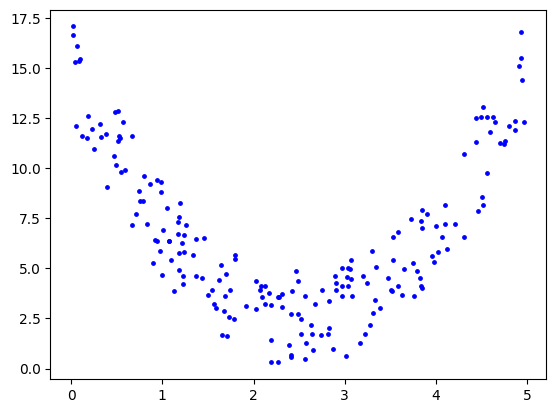

In [ ]:
## Data
x = (5*np.random.rand(200)).reshape(200,1) 
y =  2*((x-2.5)**2) + 5*np.random.rand(200,1).reshape(200,1)

plt.scatter(x,y,s=6,c='b')

In [43]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
decision_tree_reg.fit(x,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

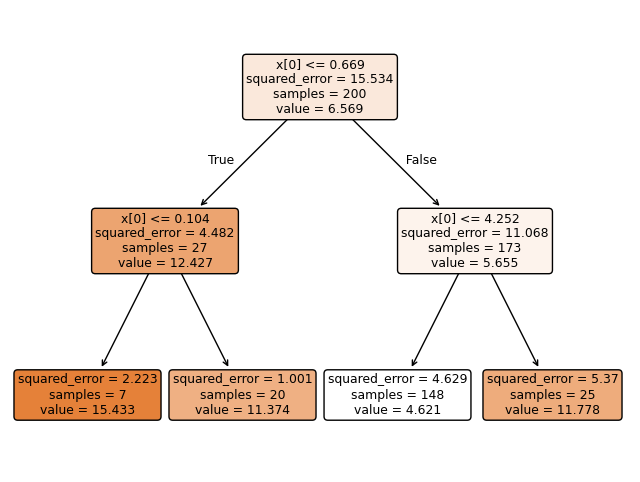

In [47]:
plt.figure(figsize=(8,6))
tree.plot_tree(
    decision_tree=decision_tree_reg,
    impurity=True,
    rounded=True,
    filled=True
)
plt.show()

This is similar to classification decision tree, except this predicts values instead of classes.   
The tree starts from root and ends at leaf by comparing feature value (single feature here)

samples: number of instances that belong to that node  
value: average value of each instance in that node

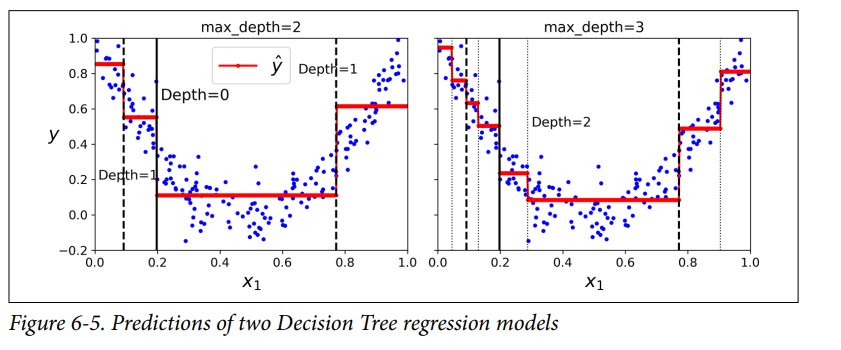

For depth=2 we have 4 leaf nodes and depth=3 we have 8 leaf node. And red lines are the avg. value of each node

### Cost function for Regression

$$
J(k, t_k) = \frac{m_{\text{left}}}{m} \text{MSE}_{\text{left}} 
          + \frac{m_{\text{right}}}{m} \text{MSE}_{\text{right}}
\quad \text{where} \quad
\begin{cases}
\text{MSE}_{\text{node}} = \sum_{i \in \text{node}} \left( \hat{y}_{\text{node}} - y^{(i)} \right)^2 \\[1.0em]
\hat{y}_{\text{node}} = \frac{1}{m_{\text{node}}} \sum_{i \in \text{node}} y^{(i)}
\end{cases}
$$


### Effect of regularization 
(otherwise it will overfit so badly)
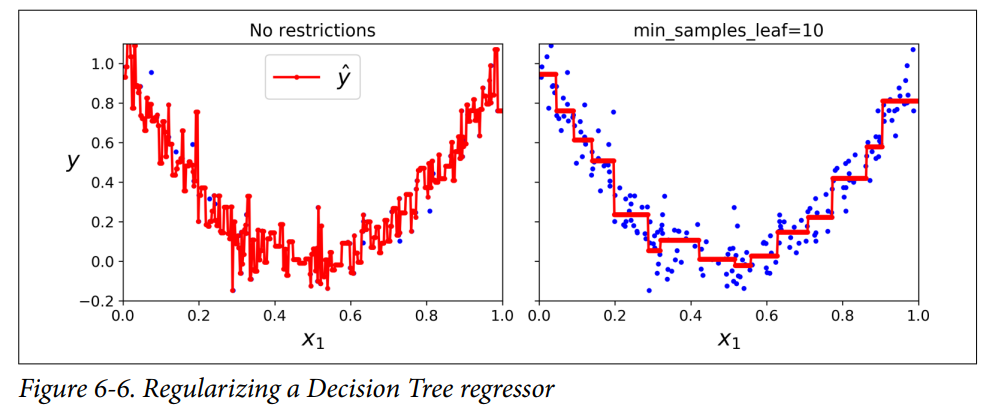

### Instability 
Main issues with Decision Tree:
1. They are sensitive to rotation of data. See the images previously shown in this notebook, you will notice that decision trees make boundaries only perpendicularily to an axis. This causes problem if the data is rotated 

See the image below, compare left to right, the model seem unnecessarily complex
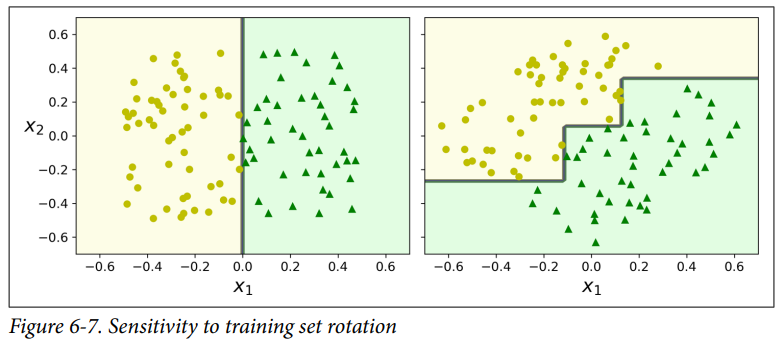


One way to deal with it is PCA (Principle component analysis) 

2. Decision Tree is sensitive to data variations, see the example below, we only removed one instance 'petals 4.8 cm long and 1.8 cm wide' and the whole model changed  
Up to down, we removed one single instance  


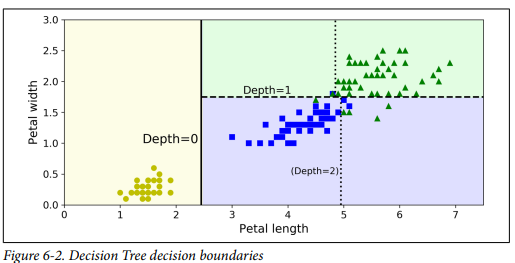

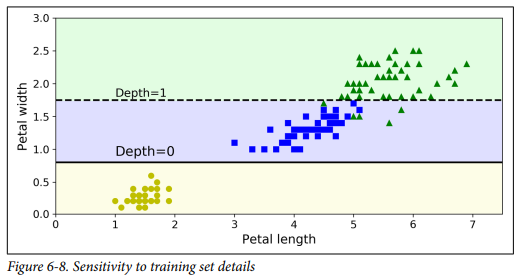

Although random forest can fix this by taking many decision trees in account 